In [ ]:
!pip install pillow
!pip install pytesseract
!pip install tesseract
!sudo apt install tesseract-ocr
!pip install numpy
!pip install easyocr
!pip install imutils
!pip install selenium

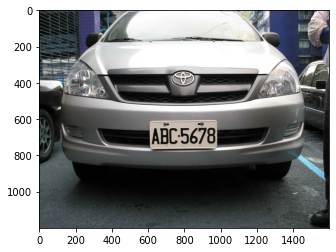

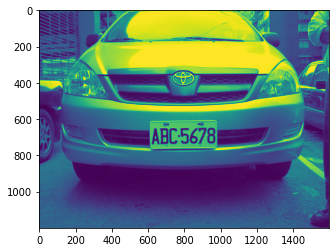

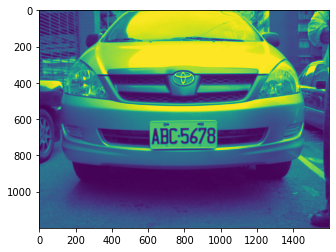

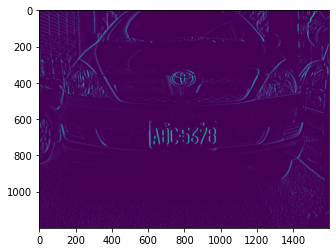

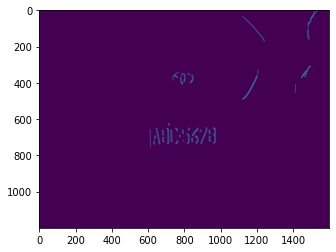

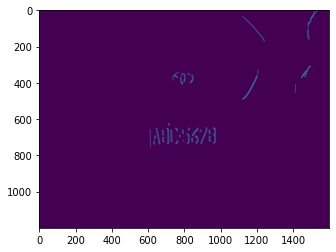

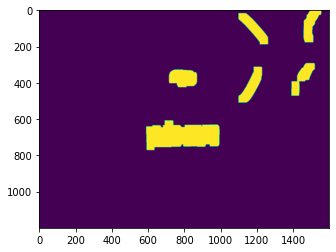

1


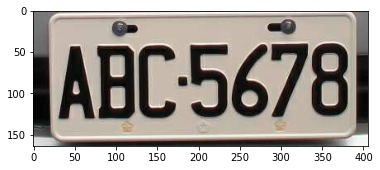

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract
import numpy as np
import easyocr

# 讀取彩色的圖片
imgadd=('/content/drive/MyDrive/1大學資料/Pyhon/期末/ABC-5678')
img = cv.imread(imgadd+'.jpg')
plt.imshow(img)
plt.show()
# 轉換為灰度圖
img1 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img1)
plt.show()
# 用Sobel進行邊緣檢測
# # 高斯模糊
img2 = cv.GaussianBlur(img1,(5,5),10)
plt.imshow(img2)
plt.show()
# Laplacian進行邊緣檢測
img3 = cv.Sobel(img2,cv.CV_8U,1,0,ksize=1)
plt.imshow(img3)
plt.show()
img4 = cv.Canny(img3,250,100)
plt.imshow(img4)
plt.show()
# 進行二值化處理
i,img5 = cv.threshold(img4,0,255,cv.THRESH_BINARY)
plt.imshow(img5)
plt.show()
# 可以侵蝕和擴張
kernel = cv.getStructuringElement(cv.MORPH_RECT,(43,33))
img6 = cv.dilate(img5,kernel)
plt.imshow(img6)
plt.show()
# # 迴圈找到所有的輪廓
i,j = cv.findContours(img6,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
result = None
for i1 in i:
    x,y,w,h = cv.boundingRect(i1)
    if w>2*h:
        print(1)
        plt.imshow(img[y:y+h,x:x+w])
        plt.show()
        cropped_image = img[y:y+h,x:x+w]
        reader = easyocr.Reader(['en'])
        result = reader.readtext(cropped_image)
        result
        
        
        


In [ ]:
import os
from selenium import webdriver
import webbrowser

reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image,detail = 0)
a=result[0]
print(len(a))
if len(a)==7:
  b=(a[0]+a[1]+a[2]+'-'+a[3]+a[4]+a[5]+a[6])
  print(b)
if len(a)==6:
  b=(a[0]+a[1]+'-'+a[2]+a[3]+a[4]+a[5])
  print(b)
url ="https://od.moi.gov.tw/adm/veh/query_veh?_m=query&vehType=A&vehNumber="+b
print(url)
webbrowser.open(url)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


7
ABC-5678
https://od.moi.gov.tw/adm/veh/query_veh?_m=query&vehType=A&vehNumber=ABC-5678


False